In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',None) #Shows all columns

In [3]:
df = pd.read_csv("project data.csv")
df.head()

,Goal Code,Goal Label,Goal Description,Target Code,Target Description,Indicator Code,Indicator Reference,Indicator Description,Series Release,Tags,Series Code,Series Description,Geographic Area Code,Geographic Area Name,Geographic Area Level,Parent Geographic Area Code,Parent Geographic Area Name,Geographic Area Type,X,Y,ISO Code,Is UN Member,Has Country Proile,Unit Multiplier,Units Code,Units Desc,Time Series Id,Time Series Keys,Number of Years Available,Earliest Year Available,Latest Year Available,Available Years,Value 2000,Value 2001,Value 2002,Value 2003,Value 2004,Value 2005,Value 2006,Value 2007,Value 2008,Value 2009,Value 2010,Value 2011,Value 2012,Value 2013,Value 2014,Value 2015,Value 2016,Value 2017,Value 2018,Value 2019,Value 2020,Latest Value,Footnotes,Nature,ObjectId,x2,y2
0,10,Goal 10,Reduce inequality within and among countries,10.7,"Facilitate orderly, safe, regular and responsi...",C100704,10.7.4,"Proportion of the population who are refugees,...",2021.Q2.G.03,"['migration policy', 'migration', 'refugees']",SM_POP_REFG_OR,"Number of refugees per 100,000 population, by ...",4,Afghanistan,5,127,Southern Asia (excluding India),Country,66.026882,33.831602,AFG,1,1,NaN,PER_100000_POP,"Per 100,000 population",SM_POP_REFG_OR,NaN,21,2000,2020,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987,6248.987,NaN,C: Country data,1,7.350079e+06,4.006213e+06
1,10,Goal 10,Reduce inequality within and among countries,10.7,"Facilitate orderly, safe, regular and responsi...",C100704,10.7.4,"Proportion of the population who are refugees,...",2021.Q2.G.03,"['migration policy', 'migration', 'refugees']",SM_POP_REFG_OR,"Number of refugees per 100,000 population, by ...",4,Afghanistan,5,127,Southern Asia (excluding India),Country,66.026882,33.831602,AFG,1,1,NaN,PER_100000_POP,"Per 100,000 population",SM_POP_REFG_OR,NaN,21,2000,2020,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987,6248.987,NaN,C: Country data,2,7.350079e+06,4.006213e+06
2,10,Goal 10,Reduce inequality within and among countries,10.7,"Facilitate orderly, safe, regular and responsi...",C100704,10.7.4,"Proportion of the population who are refugees,...",2021.Q2.G.03,"['migration policy', 'migration', 'refugees']",SM_POP_REFG_OR,"Number of refugees per 100,000 population, by ...",248,Åland Islands,5,154,Northern Europe,Country,19.809460,60.154490,ALA,0,1,NaN,PER_100000_POP,"Per 100,000 population",SM_POP_REFG_OR,NaN,21,2000,2020,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,C: Country data,3,2.205179e+06,8.434214e+06
3,10,Goal 10,Reduce inequality within and among countries,10.7,"Facilitate orderly, safe, regular and responsi...",C100704,10.7.4,"Proportion of the population who are refugees,...",2021.Q2.G.03,"['migration policy', 'migration', 'refugees']",SM_POP_REFG_OR,"Number of refugees per 100,000 population, by ...",8,Albania,5,39,Southern Europe,Country,20.066609,41.138970,ALB,1,1,NaN,PER_100000_POP,"Per 100,000 population",SM_POP_REFG_OR,NaN,21,2000,2020,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958,536.958,NaN,C: Country data,4,2.233805e+06,5.032861e+06
4,10,Goal 10,Reduce inequality within and among countries,10.7,"Facilitate orderly, safe, regular and responsi...",C100704,10.7.4,"Proportion of the population who are refugees,...",2021.Q2.G.03,"['migration policy', 'migration',

In [4]:
df['Geographic Area Code'].value_counts()

Geographic Area Code
4      2
462    2
586    2
580    2
570    2
      ..
292    1
300    1
304    1
308    1
682    1
Name: count, Length: 245, dtype: int64

In [5]:
df.columns

Index(['Goal Code', 'Goal Label', 'Goal Description ', 'Target Code',
       'Target Description', 'Indicator Code', 'Indicator Reference',
       'Indicator Description', 'Series Release', 'Tags', 'Series Code',
       'Series Description', 'Geographic Area Code', 'Geographic Area Name',
       'Geographic Area Level', 'Parent Geographic Area Code',
       'Parent Geographic Area Name', 'Geographic Area Type', 'X', 'Y',
       'ISO Code', 'Is UN Member', 'Has Country Proile', 'Unit Multiplier',
       'Units Code', 'Units Desc', 'Time Series Id', 'Time Series Keys',
       'Number of Years Available', 'Earliest Year Available',
       'Latest Year Available', 'Available Years', 'Value 2000', 'Value 2001',
       'Value 2002', 'Value 2003', 'Value 2004', 'Value 2005', 'Value 2006',
       'Value 2007', 'Value 2008', 'Value 2009', 'Value 2010', 'Value 2011',
       'Value 2012', 'Value 2013', 'Value 2014', 'Value 2015', 'Value 2016',
       'Value 2017', 'Value 2018', 'Value 2019', 'Val

In [6]:
df.shape

(276, 59)

In [7]:
# columns that will be used in the analysis

df = df[['Geographic Area Name',
       'Parent Geographic Area Name', 'X', 'Y',
        'Is UN Member',  'Value 2000', 'Value 2001',
       'Value 2002', 'Value 2003', 'Value 2004', 'Value 2005', 'Value 2006',
       'Value 2007', 'Value 2008', 'Value 2009', 'Value 2010', 'Value 2011',
       'Value 2012', 'Value 2013', 'Value 2014', 'Value 2015', 'Value 2016',
       'Value 2017', 'Value 2018', 'Value 2019', 'Value 2020']]
df.head()

,Geographic Area Name,Parent Geographic Area Name,X,Y,Is UN Member,Value 2000,Value 2001,Value 2002,Value 2003,Value 2004,Value 2005,Value 2006,Value 2007,Value 2008,Value 2009,Value 2010,Value 2011,Value 2012,Value 2013,Value 2014,Value 2015,Value 2016,Value 2017,Value 2018,Value 2019,Value 2020
0,Afghanistan,Southern Asia (excluding India),66.026882,33.831602,1,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
1,Afghanistan,Southern Asia (excluding India),66.026882,33.831602,1,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
2,Åland Islands,Northern Europe,19.809460,60.154490,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,Southern Europe,20.066609,41.138970,1,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958
4,Algeria,Northern Africa,2.678164,28.159400,1,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701


In [8]:
#Renaming the columns

df.rename(columns={'Geographic Area Name':'Country',
       'Parent Geographic Area Name':'Continent', 'X':'Latitude', 'Y':'Longitude',
        'Is UN Member':'UN Member',  'Value 2000':'2000', 'Value 2001':'2001',
       'Value 2002':'2002', 'Value 2003':'2003', 'Value 2004':'2004', 'Value 2005':'2005', 'Value 2006':'2006',
       'Value 2007':'2007', 'Value 2008':'2008', 'Value 2009':'2009', 'Value 2010':'2010', 'Value 2011':'2011',
       'Value 2012':'2012', 'Value 2013':'2013', 'Value 2014':'2014', 'Value 2015':'2015', 'Value 2016':'2016',
       'Value 2017':'2017', 'Value 2018':'2018', 'Value 2019':'2019', 'Value 2020':'2020'},inplace=True)

In [9]:
df.drop(columns=['Latitude','Longitude'], inplace=True)

In [10]:
df_new = pd.melt(df, id_vars=['Country','Continent','UN Member'], var_name='Year', value_name='number_of_refuges')

In [11]:
df_new.head()

,Country,Continent,UN Member,Year,number_of_refuges
0,Afghanistan,Southern Asia (excluding India),1,2000,14721.899
1,Afghanistan,Southern Asia (excluding India),1,2000,14721.899
2,Åland Islands,Northern Europe,0,2000,0.000
3,Albania,Southern Europe,1,2000,216.865
4,Algeria,Northern Africa,1,2000,25.813


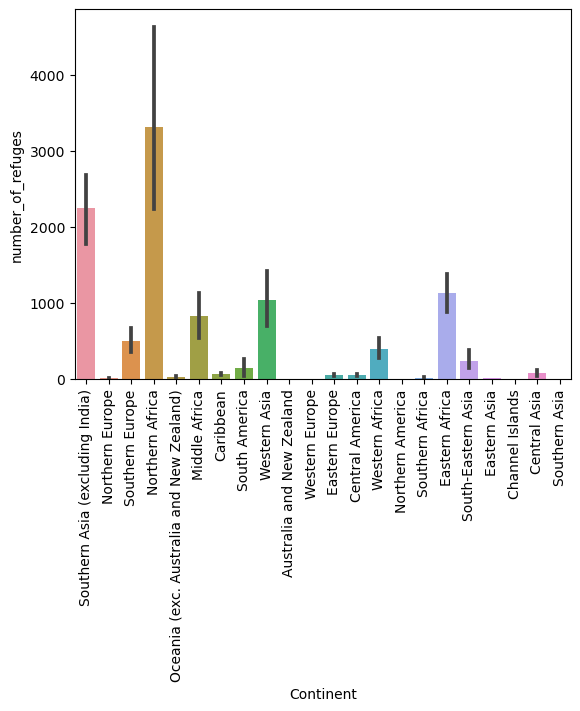

In [12]:
sns.barplot(x='Continent', y='number_of_refuges', data=df_new)
plt.xticks(rotation = 90)
plt.show()

In [56]:
# Check for missing values

df.isnull().sum()

Country      0
Continent    0
UN Member    0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
dtype: int64

In [57]:
# Check for duplicates
duplicates = df.duplicated()
print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
                                  Country  \
1                             Afghanistan   
6                          American Samoa   
20                             Bangladesh   
28                                 Bhutan   
56                           Cook Islands   
81                                   Fiji   
87                       French Polynesia   
101                                  Guam   
118                       Solomon Islands   
125                             Sri Lanka   
138                               Tokelau   
140                                 Tonga   
147                                Tuvalu   
154  United States Minor Outlying Islands   
160                               Vanuatu   
164             Wallis and Futuna Islands   
174            Iran (Islamic Republic of)   
187                              Kiribati   
203                              Maldives   
207                      Marshall Islands   
214      Micronesia (Federated States o

In [58]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
df.head(3)


DataFrame after removing duplicates:


,Country,Continent,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Southern Asia (excluding India),1,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
2,Åland Islands,Northern Europe,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,Southern Europe,1,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958


In [59]:
# Check the uniqueness of the Country Column
df.Country.unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Christmas Island',
       'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Curaçao', 'Cy

In [60]:
# Check the uniqueness of the Country Column

df.Continent.unique()

array(['Southern Asia (excluding India)', 'Northern Europe',
       'Southern Europe', 'Northern Africa',
       'Oceania (exc. Australia and New Zealand)', 'Middle Africa',
       'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Northern America',
       'Southern Africa', 'Eastern Africa', 'South-Eastern Asia',
       'Eastern Asia', 'Channel Islands', 'Central Asia', 'Southern Asia'],
      dtype=object)

In [61]:
# Define the mapping dictionary
continent_mapping = {
    'Australia and New Zealand': 'Australia/Oceania',
    'Caribbean': 'North America',
    'Central America': 'North America',
    'Central Asia': 'Asia',
    'Channel Islands': 'Europe',
    'Eastern Africa': 'Africa',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe',
    'Middle Africa': 'Africa',
    'Northern Africa': 'Africa',
    'Northern America': 'North America',
    'Northern Europe': 'Europe',
    'Oceania (exc. Australia and New Zealand)': 'Australia/Oceania',
    'South America': 'South America',
    'South-Eastern Asia': 'Asia',
    'Southern Africa': 'Africa',
    'Southern Asia': 'Asia',
    'Southern Asia (excluding India)': 'Asia',
    'Southern Europe': 'Europe',
    'Western Africa': 'Africa',
    'Western Asia': 'Asia',
    'Western Europe': 'Europe'
}

# Map the continents using the mapping dictionary
df['Continent'] = df['Continent'].map(continent_mapping)

# Display the first few rows of the DataFrame
print(df.head())

          Country          Continent  UN Member       2000       2001  \
0     Afghanistan               Asia          1  14721.899  14989.179   
2   Åland Islands             Europe          0      0.000      0.000   
3         Albania             Europe          1    216.865    243.105   
4         Algeria             Africa          1     25.813     26.697   
5  American Samoa  Australia/Oceania          0      0.000      0.000   

       2002      2003      2004      2005      2006       2007      2008  \
0  9996.763  8273.798  8895.939  7786.150  7384.261  10138.719  9272.067   
2     0.000     0.000     0.000     0.000     0.000      0.000     0.000   
3   342.946   331.895   336.204   410.321   457.541    502.930   497.301   
4    37.932    36.101    32.569    36.259    24.782     31.012    26.034   
5     0.000     0.000     0.000     0.000     0.000      0.000     0.000   

       2009      2010      2011      2012      2013      2014      2015  \
0  9229.338  9474.811  8127.7

In [62]:
df.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'North America',
       'South America'], dtype=object)

In [63]:
df.shape

(245, 24)

In [64]:
# Replace 1 with 'Yes' and 0 with 'No' in the 'UN Member' column
df['UN Member'] = df['UN Member'].replace({1: 'Yes', 0: 'No'})
df.head()

,Country,Continent,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Asia,Yes,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
2,Åland Islands,Europe,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,Europe,Yes,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958
4,Algeria,Africa,Yes,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701
5,American Samoa,Australia/Oceania,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [65]:
# Change the data type of the 'UN Member' column from int to object (string)
df['UN Member'] = df['UN Member'].astype(str)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 275
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    245 non-null    object 
 1   Continent  245 non-null    object 
 2   UN Member  245 non-null    object 
 3   2000       245 non-null    float64
 4   2001       245 non-null    float64
 5   2002       245 non-null    float64
 6   2003       245 non-null    float64
 7   2004       245 non-null    float64
 8   2005       245 non-null    float64
 9   2006       245 non-null    float64
 10  2007       245 non-null    float64
 11  2008       245 non-null    float64
 12  2009       245 non-null    float64
 13  2010       245 non-null    float64
 14  2011       245 non-null    float64
 15  2012       245 non-null    float64
 16  2013       245 non-null    float64
 17  2014       245 non-null    float64
 18  2015       245 non-null    float64
 19  2016       245 non-null    float64
 20  2017       245 

In [67]:
# Provide statistical description of the numeric columns

df.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
2000,245.0,682.355543,3106.126103,0.0,0.000,1.452,33.182,34548.804
2001,245.0,640.945233,2928.475582,0.0,0.000,1.353,37.605,33012.904
2002,245.0,605.014657,2734.611089,0.0,0.000,2.740,63.056,31351.574
2003,245.0,517.429849,2467.152126,0.0,0.000,3.038,62.631,29758.882
2004,245.0,488.740073,2366.205608,0.0,0.000,3.087,53.754,28449.596
2005,245.0,405.064641,1751.512449,0.0,0.000,4.008,62.953,17163.165
2006,245.0,412.173298,1738.522598,0.0,0.129,5.843,60.633,16688.092
2007,245.0,422.477767,1930.838355,0.0,0.000,5.101,55.936,20143.952
2008,245.0,401.607143,1845.492936,0.0,0.000,5.180,56.850,19913.938
2009,245.0,367.320816,1721.129093,0.0,0.000,5.131,53.294,19723.326


EXPLORATORY DATA ANALYSIS

Numbers of countries by continent

In [68]:
# Continent-wise Country

df.groupby('Continent').Continent.count()

Continent
Africa               60
Asia                 50
Australia/Oceania    29
Europe               51
North America        40
South America        15
Name: Continent, dtype: int64

Distribution of UN Membership

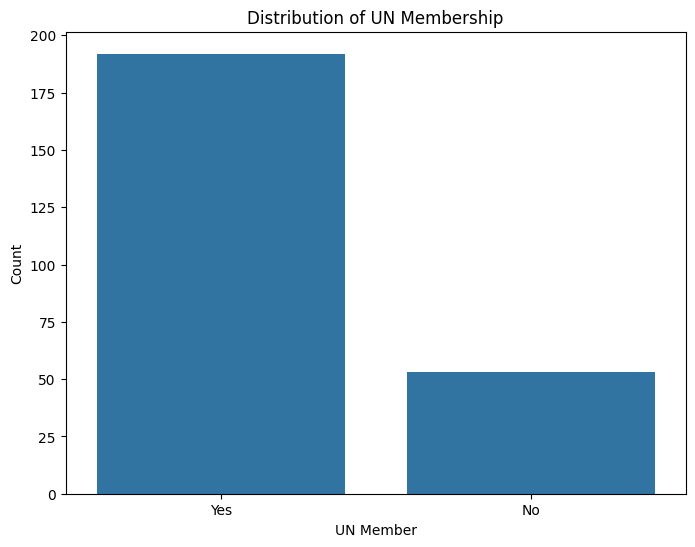

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='UN Member')
plt.title('Distribution of UN Membership')
plt.xlabel('UN Member')
plt.ylabel('Count')
plt.show()

## Total Refugees by Year

In [70]:
# First, create a new DataFrame containing only the columns with years
year_columns = df.loc[:, '2000':'2020']

# Next, sum the values in each column to get the total number of refugees for each year
total_refugees_by_year = year_columns.sum()

# Print or display the result
print(total_refugees_by_year)

2000    167177.108
2001    157031.582
2002    148228.591
2003    126770.313
2004    119741.318
2005     99240.837
2006    100982.458
2007    103507.053
2008     98393.750
2009     89993.600
2010     87692.500
2011     86398.182
2012     85378.087
2013     88547.559
2014    101927.806
2015    111201.279
2016    117568.304
2017    128577.389
2018    136819.508
2019    137826.373
2020    137768.532
dtype: float64


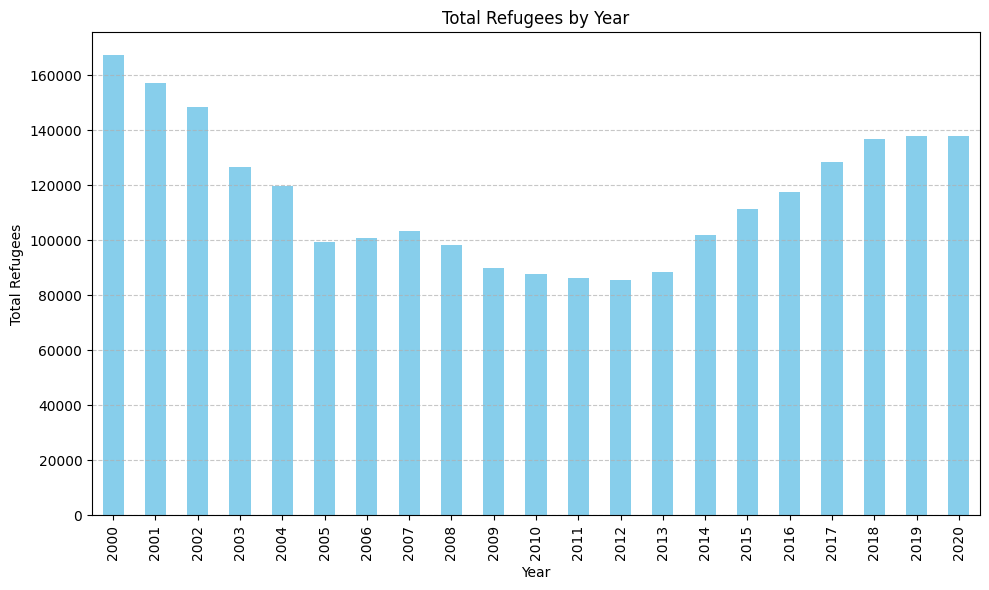

In [71]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
total_refugees_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Refugees by Year')
plt.xlabel('Year')
plt.ylabel('Total Refugees')

plt.grid(axis='y', linestyle='--', alpha=0.7)
#bars = plt.bar(total_refugees_by_year.index, total_refugees_by_year) # shows the label for each year
#plt.bar_label(bars, labels=total_refugees_by_year, label_type='edge', rotation=90)  # Rotate labels vertically
plt.tight_layout()
plt.show()


Insight: Year 2000 has the highest number of refugees while 2012 recorded the lowest influx of refugees.

Total Refugees by Continent and Years

In [72]:
# Filter the DataFrame to include only the columns containing years
years_df = df[['Continent', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
               '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Grouping the data by 'Continent' and summing the refugee counts for each year
total_refugees_by_continent = years_df.groupby('Continent').sum()

# Displaying the total refugees for each continent
print(total_refugees_by_continent)


                        2000       2001       2002       2003       2004  \
Continent                                                                  
Africa             89136.117  79445.470  76559.399  67441.616  63301.487   
Asia               55711.572  56959.008  49687.000  40969.158  40670.821   
Australia/Oceania    164.429    152.463    203.232    276.384    259.666   
Europe             21239.042  19578.146  20880.852  17227.732  14568.969   
North America        782.226    755.264    745.702    694.707    749.609   
South America        143.722    141.231    152.406    160.716    190.766   

                        2005       2006       2007       2008       2009  \
Continent                                                                  
Africa             49322.687  47656.760  48289.354  46481.842  45794.523   
Asia               38944.012  40181.022  44213.067  41034.053  33424.469   
Australia/Oceania    207.142    361.014    316.285    325.603    270.082   
Europe     

In [73]:
# import geopandas as gpd
# from shapely.geometry import Point
# import matplotlib.pyplot as plt
# # Convert longitude and latitude to Points
# geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]

# # Create a GeoDataFrame from the DataFrame and Points
# gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# # Load a world map shapefile for background
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Plotting longitude and latitude points on the map
# fig, ax = plt.subplots(figsize=(10, 6))
# world.plot(ax=ax, color='lightgrey')
# gdf.plot(ax=ax, color='red', marker='o', markersize=50)
# ax.set_title('Cities on World Map')
# plt.show()

Insight: Africa has the highest number of refugees with years 2000 and 2001 recording the highest number of African refugees.


In [74]:
df.head()

,Country,Continent,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Asia,Yes,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
2,Åland Islands,Europe,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,Europe,Yes,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958
4,Algeria,Africa,Yes,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701
5,American Samoa,Australia/Oceania,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [75]:
df['Total'] = df.iloc[:, 3:].sum(axis = 1)

df.head()

,Country,Continent,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Afghanistan,Asia,Yes,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987,180716.214
2,Åland Islands,Europe,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albania,Europe,Yes,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958,8632.386
4,Algeria,Africa,Yes,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701,427.850
5,American Samoa,Australia/Oceania,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [76]:
df['Average Refugees'] = df.iloc[:, 3:-1].mean(axis=1)

df.head()

,Country,Continent,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Average Refugees
0,Afghanistan,Asia,Yes,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987,180716.214,8605.53400
2,Åland Islands,Europe,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000
3,Albania,Europe,Yes,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958,8632.386,411.06600
4,Algeria,Africa,Yes,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701,427.850,20.37381
5,American Samoa,Australia/Oceania,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000


In [82]:
df = df.drop(columns = ['Country', 'Continent', 'UN Member' ])



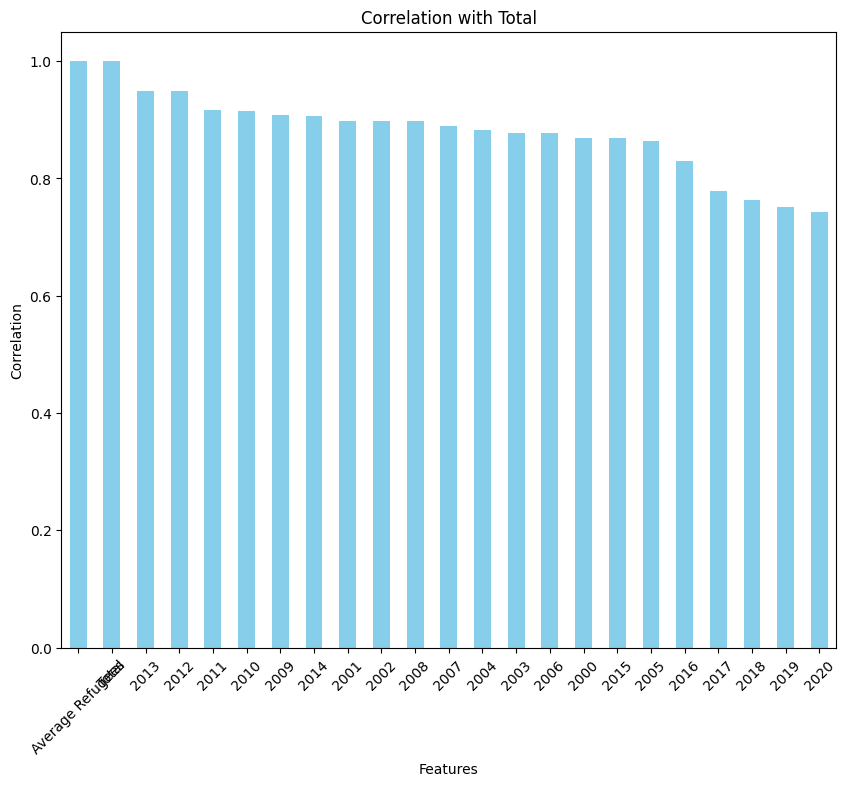

In [83]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Sort the correlations with 'Total' in descending order
corr_with_output = corr_matrix['Total'].abs().sort_values(ascending=False)

# Set your correlation threshold here
threshold = 0.1

# Select relevant features based on the threshold
relevant_features = corr_with_output[corr_with_output > threshold]

# Plot the correlation values
plt.figure(figsize=(10, 8))
relevant_features.plot(kind='bar', color='skyblue')
plt.title('Correlation with Total')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()


In [86]:
df.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', 'Total', 'Average Refugees'],
      dtype='object')

In [87]:
X = df.drop(columns = ['Total']).values
print("X :", X)
print("X shape: ",X.shape)

X : [[1.47218990e+04 1.49891790e+04 9.99676300e+03 ... 6.69021800e+03
  6.24898700e+03 8.60553400e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.16865000e+02 2.43105000e+02 3.42946000e+02 ... 5.18899000e+02
  5.36958000e+02 4.11066000e+02]
 ...
 [1.82050000e+01 0.00000000e+00 1.77430000e+01 ... 0.00000000e+00
  0.00000000e+00 1.71180952e+00]
 [1.61650000e+01 1.45050000e+01 2.77980000e+01 ... 1.30190000e+01
  1.27740000e+01 1.71939048e+01]
 [3.73000000e-01 1.37000000e-01 4.77000000e-01 ... 5.02200000e+00
  5.83100000e+00 2.36800000e+00]]
X shape:  (245, 22)


In [88]:
y = df['Total'].values
print("y :", y)
print("y shape: ",y.shape)

y : [1.80716214e+05 0.00000000e+00 8.63238600e+03 4.27850000e+02
 0.00000000e+00 1.28900000e+02 1.65279430e+04 0.00000000e+00
 9.93036000e+02 2.80170000e+01 9.15562900e+03 0.00000000e+00
 2.28100000e+00 6.17400000e+00 2.23736280e+04 8.50741000e+02
 3.58680000e+02 1.52511000e+02 5.42215000e+02 1.16435100e+03
 1.06140000e+01 1.83959000e+02 8.20150000e+01 0.00000000e+00
 1.80800123e+05 9.15960000e+01 6.82015330e+04 1.09051000e+02
 9.27900000e+00 0.00000000e+00 0.00000000e+00 1.74420000e+01
 5.82164000e+02 3.16583000e+02 8.14028320e+04 6.72640000e+01
 2.81450800e+03 1.62891900e+03 6.17500000e+00 9.00500000e+01
 1.03366453e+05 7.43117900e+03 1.13152000e+02 2.88203000e+02
 3.68900000e+00 2.52160000e+01 0.00000000e+00 0.00000000e+00
 1.05520030e+04 9.48845000e+02 9.95510800e+03 0.00000000e+00
 1.14442000e+02 4.26797100e+03 4.98430110e+04 2.14506100e+03
 1.73861000e+02 1.27910000e+01 4.00580000e+02 6.21400000e+01
 1.60295490e+04 3.14300000e+00 2.43217400e+03 1.05636300e+03
 5.59920000e+01 1.36

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the scaler
scaler = StandardScaler()


# Fit on training data and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data
X_test = scaler.transform(X_test)




In [91]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# Make predictions
y_pred = model.predict(X_test)

np.set_printoptions(precision=2)
print('Prediction     Actual')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

error = mean_squared_error(y_test, y_pred)

print('Error: ', error)

Prediction     Actual
[[-1.09e-11  0.00e+00]
 [-1.09e-11  0.00e+00]
 [-1.09e-11  0.00e+00]
 [ 2.15e+03  2.15e+03]
 [ 2.19e+01  2.19e+01]
 [ 2.09e+04  2.09e+04]
 [ 5.07e+01  5.07e+01]
 [ 3.83e+03  3.83e+03]
 [ 2.23e+02  2.23e+02]
 [ 5.60e+01  5.60e+01]
 [ 1.32e+02  1.32e+02]
 [ 5.52e+03  5.52e+03]
 [ 2.39e+01  2.39e+01]
 [ 1.24e+03  1.24e+03]
 [ 9.44e+00  9.44e+00]
 [ 5.12e+02  5.12e+02]
 [ 3.04e+01  3.04e+01]
 [ 6.78e+04  6.78e+04]
 [-1.09e-11  0.00e+00]
 [ 2.03e+04  2.03e+04]
 [ 1.53e+01  1.53e+01]
 [ 2.52e+01  2.52e+01]
 [ 1.06e+03  1.06e+03]
 [ 1.22e+02  1.22e+02]
 [ 2.27e+04  2.27e+04]
 [ 3.34e+02  3.34e+02]
 [ 3.35e+02  3.35e+02]
 [ 9.93e+02  9.93e+02]
 [-1.09e-11  0.00e+00]
 [ 2.32e+03  2.32e+03]
 [ 3.69e+00  3.69e+00]
 [ 4.78e+03  4.78e+03]
 [ 1.29e+02  1.29e+02]
 [ 8.20e+01  8.20e+01]
 [ 2.28e+00  2.28e+00]
 [ 1.63e+03  1.63e+03]
 [ 1.48e+02  1.48e+02]
 [ 3.24e+04  3.24e+04]
 [-1.09e-11  0.00e+00]
 [ 1.61e+00  1.61e+00]
 [ 2.85e+03  2.85e+03]
 [ 7.45e+02  7.45e+02]
 [ 2.17e+01 

In [97]:
from sklearn.svm import SVR

# Initialize the SVR model
model = SVR()

# Train the model
model.fit(X_train, y_train)


SVR()

In [98]:
# Make predictions
y_pred = model.predict(X_test)

np.set_printoptions(precision=2)
print('Prediction     Actual')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

error = mean_squared_error(y_test, y_pred)

print('Error: ', error)

Prediction     Actual
[[1.86e+02 0.00e+00]
 [1.86e+02 0.00e+00]
 [1.86e+02 0.00e+00]
 [1.87e+02 2.15e+03]
 [1.86e+02 2.19e+01]
 [1.95e+02 2.09e+04]
 [1.86e+02 5.07e+01]
 [1.88e+02 3.83e+03]
 [1.86e+02 2.23e+02]
 [1.86e+02 5.60e+01]
 [1.86e+02 1.32e+02]
 [1.88e+02 5.52e+03]
 [1.86e+02 2.39e+01]
 [1.87e+02 1.24e+03]
 [1.86e+02 9.44e+00]
 [1.87e+02 5.12e+02]
 [1.86e+02 3.04e+01]
 [2.04e+02 6.78e+04]
 [1.86e+02 0.00e+00]
 [1.95e+02 2.03e+04]
 [1.86e+02 1.53e+01]
 [1.86e+02 2.52e+01]
 [1.87e+02 1.06e+03]
 [1.86e+02 1.22e+02]
 [1.98e+02 2.27e+04]
 [1.86e+02 3.34e+02]
 [1.86e+02 3.35e+02]
 [1.87e+02 9.93e+02]
 [1.86e+02 0.00e+00]
 [1.87e+02 2.32e+03]
 [1.86e+02 3.69e+00]
 [1.88e+02 4.78e+03]
 [1.86e+02 1.29e+02]
 [1.86e+02 8.20e+01]
 [1.86e+02 2.28e+00]
 [1.87e+02 1.63e+03]
 [1.86e+02 1.48e+02]
 [2.01e+02 3.24e+04]
 [1.86e+02 0.00e+00]
 [1.86e+02 1.61e+00]
 [1.87e+02 2.85e+03]
 [1.87e+02 7.45e+02]
 [1.86e+02 2.17e+01]
 [1.86e+02 3.10e+01]
 [1.86e+02 1.68e+02]
 [1.87e+02 4.57e+02]
 [1.86e+02 4

In [100]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
# Make predictions
y_pred = model.predict(X_test)

np.set_printoptions(precision=2)
print('Prediction     Actual')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

error = mean_squared_error(y_test, y_pred)

print('Error: ', error)

Prediction     Actual
[[0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [2.32e+03 2.15e+03]
 [2.37e+01 2.19e+01]
 [2.52e+04 2.09e+04]
 [4.83e+01 5.07e+01]
 [3.30e+03 3.83e+03]
 [2.41e+02 2.23e+02]
 [5.73e+01 5.60e+01]
 [1.23e+02 1.32e+02]
 [4.67e+03 5.52e+03]
 [2.26e+01 2.39e+01]
 [1.29e+03 1.24e+03]
 [9.54e+00 9.44e+00]
 [4.67e+02 5.12e+02]
 [2.85e+01 3.04e+01]
 [6.49e+04 6.78e+04]
 [0.00e+00 0.00e+00]
 [1.95e+04 2.03e+04]
 [1.72e+01 1.53e+01]
 [2.55e+01 2.52e+01]
 [1.17e+03 1.06e+03]
 [1.19e+02 1.22e+02]
 [2.26e+04 2.27e+04]
 [3.30e+02 3.34e+02]
 [3.22e+02 3.35e+02]
 [9.84e+02 9.93e+02]
 [0.00e+00 0.00e+00]
 [2.44e+03 2.32e+03]
 [2.61e+00 3.69e+00]
 [5.28e+03 4.78e+03]
 [1.33e+02 1.29e+02]
 [7.92e+01 8.20e+01]
 [2.32e+00 2.28e+00]
 [1.59e+03 1.63e+03]
 [1.59e+02 1.48e+02]
 [2.55e+04 3.24e+04]
 [0.00e+00 0.00e+00]
 [3.06e-01 1.61e+00]
 [2.97e+03 2.85e+03]
 [7.23e+02 7.45e+02]
 [2.39e+01 2.17e+01]
 [2.79e+01 3.10e+01]
 [1.69e+02 1.68e+02]
 [4.49e+02 4.57e+02]
 [4.20e+02 4